In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind, linregress

In [2]:
obesity_data_to_load = "Data/share-of-adults-defined-as-obese.csv"
happiness_data_to_load = "Data/2016.csv"
life_expectancy_to_load = "Data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_10515254.csv"
gdp_to_load = "Data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10515210.csv"

In [3]:
obesity_data = pd.read_csv(obesity_data_to_load)
happiness_data = pd.read_csv(happiness_data_to_load)
life_expectancy_data = pd.read_csv(life_expectancy_to_load)
gdp_data = pd.read_csv(gdp_to_load)

In [4]:
obesity_data.head()

,Entity,Code,Year,"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Age Group:18+ years - Sex:Both sexes (%)"
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [5]:
happiness_data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
life_expectancy_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.016,75.158,75.299,75.440,75.582,75.725,75.867,NaN,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,61.226,61.666,62.086,62.494,62.895,63.288,63.673,NaN,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,58.192,59.042,59.770,60.373,60.858,61.241,61.547,NaN,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,76.652,77.031,77.389,77.702,77.963,78.174,78.345,NaN,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN,NaN


In [24]:
# Cleaning Obesity Data
obesity_data_columns_renamed = obesity_data.rename(columns = {
    "Entity": "Country",
    "Code": "Country_Code", 
    "Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Age Group:18+  years - Sex:Both sexes (%)": "Obesity Percentage"}
                   )

obesity_data_columns_renamed["Year"] = obesity_data_columns_renamed["Year"].apply(str)
obesity_data_columns_renamed.dtypes

obesity_data_2016 = obesity_data_columns_renamed.loc[obesity_data_columns_renamed["Year"] == "2016",:]


obesity_data_country_indexed = obesity_data_2016.set_index("Country")
obesity_data_country_indexed.head()

,Country_Code,Year,Obesity Percentage
Country,,,
Afghanistan,AFG,2016,5.5
Albania,ALB,2016,21.7
Algeria,DZA,2016,27.4
Andorra,AND,2016,25.6
Angola,AGO,2016,8.2


In [12]:
life_expectancy_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [13]:
# Cleaning Life Expectancy Data
life_expectancy_data_2016 = pd.DataFrame({"Country Name" : life_expectancy_data["Country Name"],
                                         "Year" : life_expectancy_data["2016"]})


life_expectancy_data_2016_clean = life_expectancy_data_2016.dropna(subset = ['Year'])
life_expectancy_cleaned = life_expectancy_data_2016_clean.set_index("Country Name")
life_expectancy_cleaned.head()

,Year
Country Name,
Aruba,75.867000
Afghanistan,63.673000
Angola,61.547000
Albania,78.345000
Arab World,71.198456


In [14]:
# Cleaning GDP Data
gdp_data_2016 = pd.DataFrame({"Country Name" : gdp_data["Country Name"],
                            "Year" : gdp_data["2016"]})


gdp_data_2016_clean = gdp_data_2016.dropna(subset = ['Year'])
gdp_data_2016_clean = gdp_data_2016_clean.set_index("Country Name")
gdp_data_2016_clean.head()

,Year
Country Name,
Aruba,2.646927e+09
Afghanistan,1.904636e+10
Angola,1.011239e+11
Albania,1.188368e+10
Andorra,2.877312e+09


In [15]:
happiness_data.count()

Country                          157
Region                           157
Happiness Rank                   157
Happiness Score                  157
Lower Confidence Interval        157
Upper Confidence Interval        157
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         157
Freedom                          157
Trust (Government Corruption)    157
Generosity                       157
Dystopia Residual                157
dtype: int64

In [16]:
obesity_data_country_indexed.count()

Country_Code          190
Year                  191
Obesity Percentage    191
dtype: int64

In [17]:
# Merge Happiness and Obesity Data Sets
merged_obesity_happiness_data = pd.merge(happiness_data,obesity_data_country_indexed, how = "left", on = "Country")
merged_obesity_happiness_data

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Code,Year,Obesity Percentage
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,DNK,2016,19.7
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,CHE,2016,19.5
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,ISL,2016,21.9
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,NOR,2016,23.1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,FIN,2016,22.2
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,CAN,2016,29.4
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,NLD,2016,20.4
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,NZL,2016,30.8
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,AUS,2016,29.0
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,SWE,2016,20.6


In [18]:
cleaned_merge = merged_obesity_happiness_data.dropna(subset = ['Obesity Percentage'])
cleaned_merge.count()

Country                          145
Region                           145
Happiness Rank                   145
Happiness Score                  145
Lower Confidence Interval        145
Upper Confidence Interval        145
Economy (GDP per Capita)         145
Family                           145
Health (Life Expectancy)         145
Freedom                          145
Trust (Government Corruption)    145
Generosity                       145
Dystopia Residual                145
Country_Code                     145
Year                             145
Obesity Percentage               145
dtype: int64

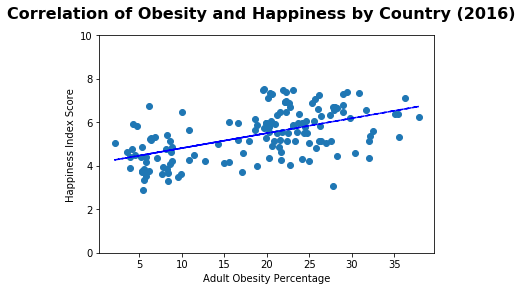

In [39]:
(slope, intercept, _, _, _) = linregress(cleaned_merge["Obesity Percentage"],cleaned_merge["Happiness Score"])
fit = slope * cleaned_merge["Obesity Percentage"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of Obesity and Happiness by Country (2016)", fontsize=16, fontweight="bold")
ax.set_ylim(0, 10)
ax.set_xlabel("Adult Obesity Percentage")
ax.set_ylabel("Happiness Index Score")
ax.plot(cleaned_merge["Obesity Percentage"],cleaned_merge["Happiness Score"], linewidth=0, marker='o')
ax.plot(cleaned_merge["Obesity Percentage"], fit, 'b--')
plt.show()

In [34]:
# Find Statistical Significance of Correlation of Obesity and Happiness by Country
(t_stat, p) = ttest_ind(cleaned_merge["Obesity Percentage"],cleaned_merge["Happiness Score"], equal_var=False)
print((t_stat, p))
if p < 0.05:
    print("The differences between the Obesity Percentage and Happiness Score are significant.")
else:
    print("The differences between  the Obesity Percentage and Happiness Score are due to chance.")

(17.606016656634473, 3.3869725183559186e-38)
The differences between the Obesity Percentage and Happiness Score are significant.


In [41]:
obesity_data_country_indexed.count()

Country_Code          190
Year                  191
Obesity Percentage    191
dtype: int64

In [40]:
life_expectancy_cleaned.count()

Year    245
dtype: int64

In [ ]:
# Merge Happiness and Obesity Data Sets
merged_obesity_happiness_data = pd.merge(happiness_data,obesity_data_country_indexed, how = "left", on = "Country")
merged_obesity_happiness_data